In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#https://drive.google.com/file/d/18ycYDiKawgX8wOfQKQ2vQBjqwMj7ZP6J/view?usp=sharing

In [5]:
#!pip install -q gdown
#!gdown https://drive.google.com/uc?id=18ycYDiKawgX8wOfQKQ2vQBjqwMj7ZP6J

In [6]:
df = pd.read_csv('income_homework.csv')

In [7]:
df.head()

,id,year,region,income,family_member,gender,year_born,education_level,marriage,job_type,company_size,reason_none_worker
0,10101,2005,1,558182,1,2,1936,2,2,,,8
1,10101,2011,1,814546,1,2,1936,2,2,,,10
2,10101,2012,1,1190910,1,2,1936,2,2,,,10
3,10101,2013,1,2007273,1,2,1936,2,2,,,1
4,10101,2014,1,785455,1,2,1936,2,2,,,10


#Краткое описание данных
Данные по соц-дему и объему годового дохода.

* id
* year - год сбора данных
* region - регион проживания
* income - годовой доход
* family_member - количество членов семьи
* gender - пол (1 - мужчина, 2 - женщина)
* year_born - год рождения
* education_level - уровень образования 
** 1 - no education (under 7 yrs-old) 
** 2 - no education (7 & over 7 yrs-old) 
** 3 - elementary 
** 4 - middle school 
** 5 - high school 
** 6 - college 
** 7 - university degree 
** 8 - MA 
** 9 - doctoral degree
* marriage - семейное положение
** 1 - not applicable (under 18) 
** 2 - married 
** 3 - separated by death 
** 4 - separated 
** 5 - not married yet 
** 6 - others
* job_type - отрасль работы (словарь в отдельном датасете)
* company_size - размер компании
* reason_none_worker - причина отсутствия работы
** 1 - no capable 
** 2 - in military service 
** 3 - studying in school 
** 4 - prepare for school 
** 5 - prepare to apply job 
** 6 - house worker 
** 7 - caring kids at home 
** 8 - nursing 
** 9 - giving-up economic activities 
** 10 - no intention to work 
** 11 - others

# Словарь по отрасли работы
https://docs.google.com/spreadsheets/d/1hYE1vCxTIhAKCKK5vLl2iF5xdm9dZDkf/edit?usp=sharing&ouid=103932844454011499284&rtpof=true&sd=true

# Домашнее задание

Построить модель, предсказывающую годовой доход. Использовать линейную регрессию.

Целевая переменная - годовой доход клиента - income.

1. Выполнить проверку переменных (минимум 3 шт), преобразовать их при необходимости - 3 балла

2. Построить на отобранных данных линейную регрессию - 1 балл

3. Оценить качество модели, проверить ее на тестовой выборке - 1 балл

# Проверка переменных на ЛЗ

In [21]:
from sklearn.linear_model import LinearRegression

def simple_reg(predictor, target):
    '''вспомогательная функция, отрисовка прямой для простой регресии'''
    check = LinearRegression()
    check.fit(predictor.reshape(-1,1),target)
    return hv.Curve((np.array([i for i in np.linspace(min(predictor),max(predictor),100)]),
                     check.coef_*np.array([i for i in np.linspace(min(predictor),
                                                                  max(predictor),100)]) + check.intercept_))

In [24]:
def make_bucket(df,feature, n =  100):
    '''функция, бьющая на бакеты(по умолчанию 100 точек)'''
    return df.assign(bucket = np.ceil(df[feature].rank(pct = True) * n))

In [26]:
#%%output size=200
#df.pipe(make_bucket,'region')\
#  .groupby(by = ['bucket']).mean()\
#  .pipe(lambda x:hv.Scatter(zip(np.array(x['region']), np.array(x['reason_none_worker'])),
#                            kdims = ['region'],vdims=['reason_none_worker'],
#                            label = 'Проверка линейности зависимости reason_none_worker от region')
#         *simple_reg(np.array(df.age),np.array(df.monthly_income_amt)))

# Строим модель и определяем качество

In [8]:
X = df.drop("reason_none_worker", axis=1)
y = df["reason_none_worker"]

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
from sklearn.linear_model import LinearRegression

#reg = LinearRegression()
#reg.fit(X_train, y_train)

#print("Сдвиг={}".format(reg.intercept_))
#print("Массив коэффициентов={}".format(reg.coef_))

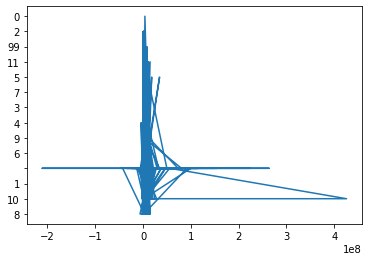

In [15]:
plt.plot(df['income'],df['reason_none_worker'])

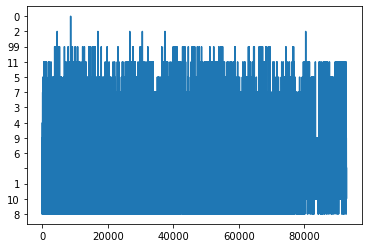

In [20]:
plt.plot(df['reason_none_worker'])